Because a whole model would be too large, we're not going to load it and run it on examples. Thankfully, our work isn't focused on the performance of the model, so we can still show.

Training and partial model saving happens in main.py, and the core model is in simple_densenet.py

In [4]:
import numpy as np
import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
def show_selectors(path):
    selectors = pickle.load(open(path,'rb'))
    weights = [s for s in selectors if len(s.shape)==4]

    weights = [w.reshape((w.shape[0],w.shape[1])) for w in weights]
    weights = [np.abs(w) for w in weights]
#     weights = [w/np.std(w) for w in weights]
    max_width = 600
    
    weights = [np.pad(w,((0,0),(0,600-w.shape[1])),'constant',constant_values=-0.01) for w in weights]
    weights = np.concatenate(weights,axis=0)
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    ax.imshow(weights)
    plt.show()


## Testing the base model.
The first test is to see what things look like with just L2 regularization. We expect to primarily see noise in our triangle.

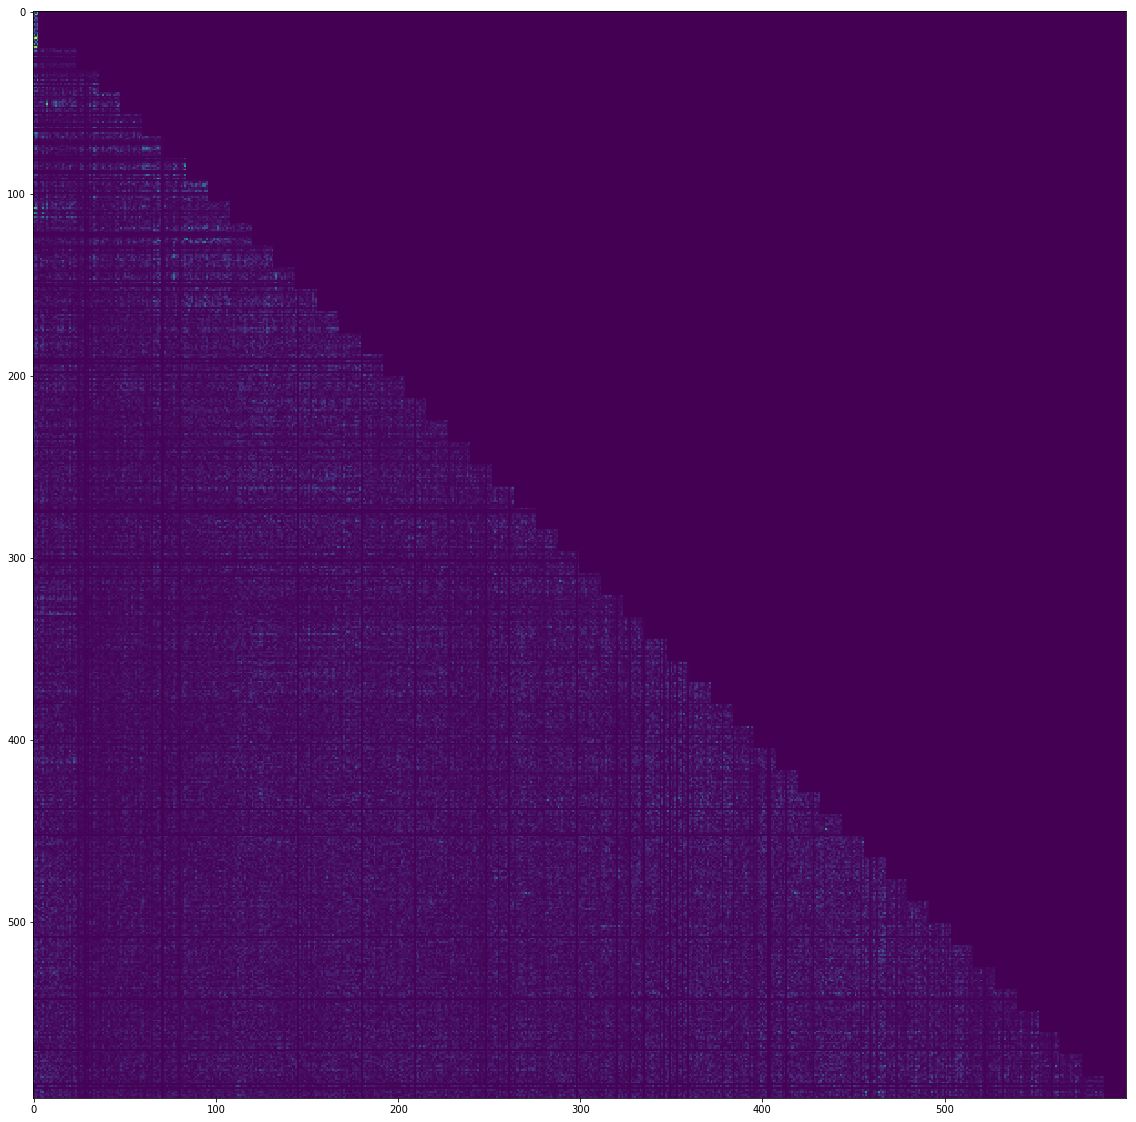

In [15]:
show_selectors('no_reg/020')

The result matches our hypothesis. We note the vertical and horizontal bands, the former indicative of layers that in general aren't used much, and the latter indicative of neurons that have very small input weights. Interestingly enough, the output connections are still quite strong after most of these, indicating that perhaps the network compensates for the low input parameter norms with high output parameter norms. This is entirely conjecture however.

## Testing the sparsified models.

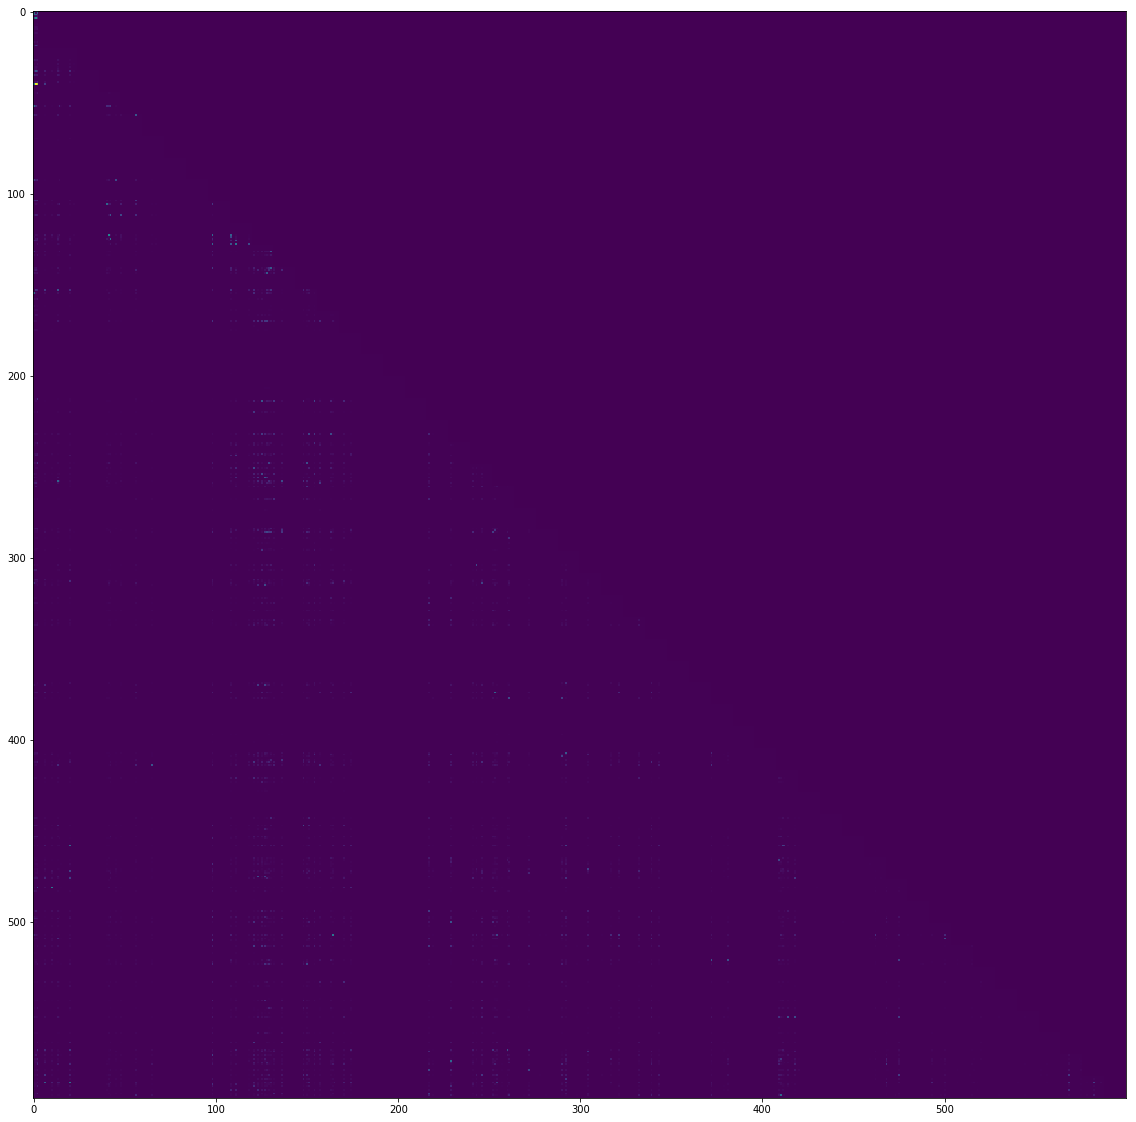

In [16]:
show_selectors('l1_reg/020')

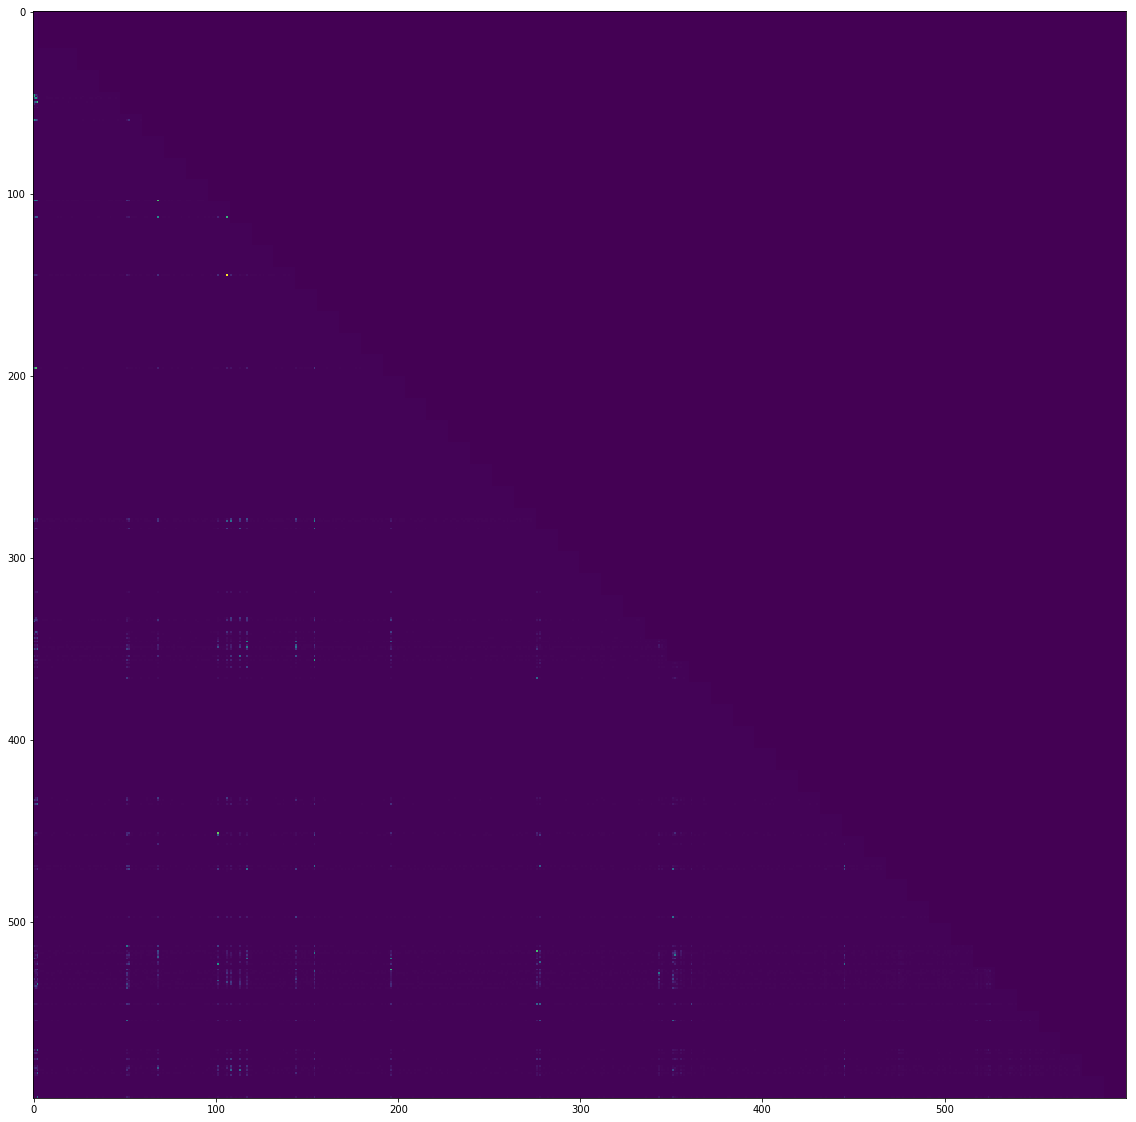

In [17]:
show_selectors('l2_l1_reg/020')

To our great disappointment, we do not observe any of the topological structures noted in the LogDenseNet paper. Instead we see bright vertical bands, as well as less noticeable horizontal bands. This implies that outputs that are important to some active layers are important to all active layers.